In [11]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pickle as pk
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.decomposition import PCA
import os
fold = os.getcwd()

## Fig 1

In [13]:
file = open(fold + "/data_aux/feature_a1.pkl","rb")
data = pk.load(file)
file.close()
d2_d = data["d2_d"]
d2_d = d2_d.loc[d2_d.pvalue<=0.05]
d2_d.loc[d2_d.index,"cib"] = d2_d.ci2 -d2_d.beta
d2_d.loc[d2_d.index,"cia"] = d2_d.beta - d2_d.ci1
d2_d = d2_d.sort_values(by="beta",ascending=True).copy()
file = open(fold + "/data_aux/immune_clean_a1.pkl","rb")
data = pk.load(file)
file.close()

df_d2_d = data["d2_d"]
df_d2_d=df_d2_d[list(d2_d["var"])[0:35] + ["Sample"] + ["d2_d"]].copy()

del file
del data

name = list(df_d2_d.columns)[0:35]
name.insert(3,"")
specs=[[{},{},{}, {"rowspan": 12}]]
for i in range(1,12):
    specs.append([{},{},{},None])
f = go.FigureWidget(make_subplots(rows=12,cols=4,subplot_titles=name,column_widths=[0.15, 0.15,0.15,0.55],vertical_spacing=0.02,specs=specs))
for i in range(35):
    col = i%3+1
    row = int(i/3)+1
    f.add_trace(go.Box(y=df_d2_d.loc[df_d2_d.d2_d==1,:].iloc[:,i],name="detectable",boxpoints='all', boxmean=True,fillcolor="coral",line =dict(color = "red",width=1) ), row=row, col=col)
    f.add_trace(go.Box(y=df_d2_d.loc[df_d2_d.d2_d==0,:].iloc[:,i],name="non-detectable",boxpoints='all', boxmean=True,fillcolor="lightblue",line = dict(color = "blue",width =1)), row=row, col=col)
f.update_annotations(font_size=7.5,font_family="Arial Black")
f.update_layout(height=2000,width = 1900,showlegend=False,font_size=8,font_family="Arial")
f.update_traces(marker=dict(size= 3), selector=dict(type='box'))
f.add_trace(go.Scatter(x=d2_d["beta"], y=d2_d["var"],error_x=dict(
            type='data',
            symmetric=False,
            array=d2_d.cib,
            arrayminus=d2_d.cia),mode='markers'),row=1,col=4)
f.layout.xaxis4.domain = [0.70,1]
for annotation in f['layout']['annotations']: 
    annotation['textangle']=-3

f.update_traces(marker=dict(color="black", size=6),selector=dict(type='scatter'))
f.add_vline(x=1,line_dash="dash",row=1,col=4)
f.layout.xaxis4.type="log"
f.update_xaxes(range=[-1,1],title="log Odds ration (z-score)",row=1,col=4)
f.update_yaxes(range=[-1, 35],title="",row=1,col=4)
f.layout.yaxis4.domain = (0.6,1)

sp = ""
for i in range(63):
    sp = sp + "aa"
f.layout.title.text = "A<span style='color:white'>" + sp + "<span style='color:black'>B"
f.layout.title.font.family = "Arial Black"
f.layout.template = "plotly_white"
#f.write_image("fig1.svg")
f

C:\Users\valenter\AppData\Local\Temp\ipykernel_8728\3962107912.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\valenter\AppData\Local\Temp\ipykernel_8728\3962107912.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



FigureWidget({
    'data': [{'boxmean': True,
              'boxpoints': 'all',
              'fillcolor': 'co…

## Fig 2

In [14]:
file = open(fold + "/data_aux/feature_a1.pkl","rb")
data = pk.load(file)
file.close()
d3_d = data["d3_d"]
d3_d = d3_d.loc[d3_d.pvalue<=0.05]
d3_d.loc[d3_d.index,"cib"] = d3_d.ci2 -d3_d.beta
d3_d.loc[d3_d.index,"cia"] = d3_d.beta - d3_d.ci1
d3_d = d3_d.sort_values(by="beta",ascending=True).copy()
file = open(fold + "/data_aux/immune_clean_a1.pkl","rb")
data = pk.load(file)
file.close()
df_d3_d = data["d3_d"].copy()
df_d3_d=df_d3_d[list(d3_d["var"])[0:35]+["Sample"]+ ["d3_d"]].copy()
del file
del data



name = list(df_d3_d.columns)[0:19]
name.insert(3,"")
specs=[[{},{},{}, {"rowspan": 7}]]
for i in range(1,7):
    specs.append([{},{},{},None])
f = go.FigureWidget(make_subplots(rows=7,cols=4,subplot_titles=name,column_widths=[0.15, 0.15,0.15,0.55],vertical_spacing=0.05,specs=specs))
for i in range(19):
    col = i%3+1
    row = int(i/3)+1
    f.add_trace(go.Box(y=df_d3_d.loc[df_d3_d.d3_d==1,:].iloc[:,i],name="detectable",boxpoints='all', boxmean=True,fillcolor="coral",line =dict(color = "red",width=1) ), row=row, col=col)
    f.add_trace(go.Box(y=df_d3_d.loc[df_d3_d.d3_d==0,:].iloc[:,i],name="non-detectable",boxpoints='all', boxmean=True,fillcolor="lightblue",line = dict(color = "blue",width =1)), row=row, col=col)
f.update_annotations(font_size=7.5,font_family="Arial Black")
f.update_layout(height=1200,width = 1900,showlegend=False,font_size=8,font_family="Arial")
f.update_traces(marker=dict(size= 3), selector=dict(type='box'))
f.add_trace(go.Scatter(x=d3_d["beta"], y=d3_d["var"],error_x=dict(
            type='data',
            symmetric=False,
            array=d3_d.cib,
            arrayminus=d3_d.cia),mode='markers'),row=1,col=4)
f.layout.xaxis4.domain = [0.70,1]
#for annotation in f['layout']['annotations']: 
#    annotation['textangle']=-3

f.update_traces(marker=dict(color="black", size=6),selector=dict(type='scatter'))
f.add_vline(x=1,line_dash="dash",row=1,col=4)
f.layout.xaxis4.type="log"
f.update_xaxes(range=[-1,1],title="log Odds ration (z-score)",row=1,col=4)
f.update_yaxes(range=[-1, 19],title="",row=1,col=4)
f.layout.yaxis4.domain = (0.6,1)

sp = ""
for i in range(63):
    sp = sp + "aa"
f.layout.title.text = "A<span style='color:white'>" + sp + "<span style='color:black'>B"
f.layout.title.font.family = "Arial Black"
f.layout.template = "plotly_white"
#f.write_image("fig2.svg")
f

C:\Users\valenter\AppData\Local\Temp\ipykernel_8728\3554163845.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\valenter\AppData\Local\Temp\ipykernel_8728\3554163845.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



FigureWidget({
    'data': [{'boxmean': True,
              'boxpoints': 'all',
              'fillcolor': 'co…

## Fig 3

In [10]:
file = open(fold + "/data_aux/immune_clean_a2.pkl","rb")
data = pk.load(file)
file.close()
data.keys()
all_x_d2_d = data["x_d2_d"]
all_x_d3_d = data["x_d3_d"]

y_d2_d = data["y_d2_d"]
y_d3_d = data["y_d3_d"]

file = open(fold + "/data_aux/feature.dat","rb")
data = pk.load(file)
file.close()
df_d2_d = data["SVM_RFE_d2_d"]["df"]
df_d2_d = df_d2_d.sort_values(by="impor_mean",ascending=False)
df_d2_d = list(df_d2_d.iloc[:,0])
df_d2_d.remove("age")

s_x_d2_d = all_x_d2_d[df_d2_d].copy()

df_d3_d = data["SVM_RFE_d3_d"]["df"]
df_d3_d = df_d3_d.sort_values(by="impor_mean",ascending=False)
df_d3_d = list(df_d3_d.iloc[:,0])
df_d3_d.remove("age")
df_d3_d.remove("tx_time")
s_x_d3_d = all_x_d3_d[df_d3_d].copy()

In [10]:
file = open(fold + "/data_aux/immune_clean_a3.pkl","rb")
data = pk.load(file)
file.close()

all_d2_d = data["d2_d"][["type","d2_d"]+immune_col]
all_d3_d = data["d3_d"][["type","d3_d"]+immune_col]
all_d2_d["tp"] = np.nan
all_d3_d["tp"] = np.nan
all_d2_d.loc[all_d2_d["d2_d"]==0,"tp"] = "dose 2 non-responders"
all_d2_d.loc[all_d2_d["d2_d"]==1,"tp"] = "dose 2 detectable"
all_d2_d.loc[all_d2_d["type"]=="i","tp"] = "healthy"
all_d3_d.loc[all_d3_d["d3_d"]==0,"tp"] = "dose 3 non-responders"
all_d3_d.loc[all_d3_d["d3_d"]==1,"tp"] = "dose 3 detectable"
all_d3_d.loc[all_d3_d["type"]=="i","tp"] = "healthy"
del all_d2_d["type"]
del all_d2_d["d2_d"]
del all_d3_d["type"]
del all_d3_d["d3_d"]
file = open(fold + "/data_aux/feature.dat","rb")
data = pk.load(file)
file.close()

#df -> all_d2_d
x = all_d2_d.copy()
y = all_d2_d["tp"].copy()
del x["tp"]
st = StandardScaler()
colun = x.columns
x= st.fit_transform(x)
aux = x.copy()
aux = pd.DataFrame(aux, columns = colun)
pca = PCA(n_components=min(len(x[:,0]), len(x[0,:]))-10)
x =pca.fit_transform(x)
lda = LinearDiscriminantAnalysis(n_components=2,solver="eigen")
lda.fit(X = x,y=y)
var = lda.transform(x)
df = pd.DataFrame({"First Linear Discriminant":var[:,0],"Second Linear Discriminant":var[:,1],"y":y})
df = pd.concat([df, aux], axis=1)

col = list(df.columns)
col1 = col[3:]
lo = pca.components_.T * np.sqrt(pca.explained_variance_)
v1 = ["CD94+ median  :in:  CD94+ NKT Cells",
     "CD57+ NKT Cells :in: NKT Cells",
     "CD40+ B Cells :in: B Cells",
     "CD80+ median  :in:  CD80+ Switched Memory B Cells",
     "CD94+ median  :in:  CD94+ NK Cells"]
p1 ={}
for i, feature in enumerate(v1):
    p1[feature] = lda.transform(lo[i,:].reshape(1, -1))[0]


#df2-> selected d2_d
df_d2_d = data["SVM_RFE_d2_d"]["df"]
df_d2_d = df_d2_d.sort_values(by="impor_mean",ascending=False)
df_d2_d = list(df_d2_d.iloc[:,0])
df_d2_d.remove("age")
x = all_d2_d.loc[:,df_d2_d ].copy()
y = all_d2_d["tp"].copy()
st = StandardScaler()
colun = x.columns
x= st.fit_transform(x)
aux = x.copy()
aux = pd.DataFrame(aux, columns = colun)
pca = PCA(n_components=min(len(x[:,0]), len(x[0,:])))
x =pca.fit_transform(x)

lda = LinearDiscriminantAnalysis(n_components=2,solver="eigen")
lda.fit(X = x,y=y)
var = lda.transform(x)
df2 = pd.DataFrame({"First Linear Discriminant":var[:,0],"Second Linear Discriminant":var[:,1],"y":y})
df2 = pd.concat([df2, aux], axis=1)

lo = pca.components_.T * np.sqrt(pca.explained_variance_)
p2 ={}
for i, feature in enumerate(v1):
    p2[feature] = lda.transform(lo[i,:].reshape(1, -1))[0]
    
#df3-> all_d3_d
x = all_d3_d.copy()
y = all_d3_d["tp"].copy()
del x["tp"]
st = StandardScaler()
colun = x.columns
x= st.fit_transform(x)
aux = x.copy()
aux = pd.DataFrame(aux, columns = colun)
pca = PCA(n_components=min(len(x[:,0]), len(x[0,:]))-10)
x =pca.fit_transform(x)
lda = LinearDiscriminantAnalysis(n_components=2,solver="eigen")
lda.fit(X = x,y=y)
var = lda.transform(x)
lda.explained_variance_ratio_
df3 = pd.DataFrame({"First Linear Discriminant":var[:,0],"Second Linear Discriminant":var[:,1],"y":y})
aux = all_d3_d
df3 = pd.concat([df3, aux], axis=1)

col = list(df3.columns)
col1 = col[3:]
lo = pca.components_.T * np.sqrt(pca.explained_variance_)
v1 = ["CD40+ B Cells :in: B Cells",
      "CD94+ median  :in:  CD94+ NKT Cells",
      "CD38+ median  :in:  CD38+ NKT Cells",
      "CD40+ IgMlow IgD+ Naive B Cells :in: IgMlow IgD+ Naive B Cells"
     ]
p3 ={}
for i, feature in enumerate(v1):
    p3[feature] = lda.transform(lo[i,:].reshape(1, -1))[0]

#df4-> selected d3_d
df_d3_d = data["SVM_RFE_d3_d"]["df"]
df_d3_d = df_d3_d.sort_values(by="impor_mean",ascending=False)
df_d3_d = list(df_d3_d.iloc[0:50:,0])
df_d3_d.remove("tx_time")
x = all_d3_d.loc[:,df_d3_d ].copy()
y = all_d3_d["tp"].copy()
st = StandardScaler()
colun = x.columns
x= st.fit_transform(x)
aux = x.copy()
aux = pd.DataFrame(aux, columns = colun)
pca = PCA(n_components=min(len(x[:,0]), len(x[0,:]))-2)
x =pca.fit_transform(x)
lda = LinearDiscriminantAnalysis(n_components=2,solver="eigen")
lda.fit(X = x,y=y)
var = lda.transform(x)
df4 = pd.DataFrame({"First Linear Discriminant":var[:,0],"Second Linear Discriminant":var[:,1],"y":y})
df4 = pd.concat([df4, aux], axis=1)

lo = pca.components_.T * np.sqrt(pca.explained_variance_)
p4 ={}
for i, feature in enumerate(v1):
    p4[feature] = lda.transform(lo[i,:].reshape(1, -1))[0]
#figure

f = go.FigureWidget(make_subplots(rows=2,cols=2,subplot_titles=["A","B","C","D"],vertical_spacing=0.2,horizontal_spacing=0.2))
f.add_trace(go.Scatter(x=df.loc[df.y=="healthy","First Linear Discriminant"],y=df.loc[df.y=="healthy","Second Linear Discriminant"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1'),row=1,col=1)
f.add_trace(go.Scatter(x=df.loc[df.y=="dose 2 non-responders","First Linear Discriminant"],y=df.loc[df.y=="dose 2 non-responders","Second Linear Discriminant"],mode='markers',marker=dict(color="coral",symbol="star"),name = "dose 2 non-responders",legendgroup='2'),row=1,col=1)
f.add_trace(go.Scatter(x=df.loc[df.y=="dose 2 detectable","First Linear Discriminant"],y=df.loc[df.y=="dose 2 detectable","Second Linear Discriminant"],mode='markers',marker=dict(color="rgba(41, 128, 185, 1.0)"),name = "dose 2 detectable",legendgroup='3'),row=1,col=1)
for k in p1.keys():
    f.add_shape(
        type='line',
        x0=0, y0=0,
        x1=p1[k][0]*20,
        y1=p1[k][1]*20,
        line_width = 1,
        row=1,col=1
    )
    f.add_annotation(
        x=p1[k][0]*20,
        y=p1[k][1]*20,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=k,
        font_size = 10,
        textangle=-20,
        row=1,col=1
    )

f.add_trace(go.Scatter(x=df2.loc[df2.y=="healthy","First Linear Discriminant"],y=df2.loc[df2.y=="healthy","Second Linear Discriminant"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=1,col=2)
f.add_trace(go.Scatter(x=df2.loc[df2.y=="dose 2 non-responders","First Linear Discriminant"],y=df2.loc[df2.y=="dose 2 non-responders","Second Linear Discriminant"],mode='markers',marker=dict(color="coral",symbol="star"),name = "dose 2 non-responders",legendgroup='2',showlegend=False),row=1,col=2)
f.add_trace(go.Scatter(x=df2.loc[df2.y=="dose 2 detectable","First Linear Discriminant"],y=df2.loc[df2.y=="dose 2 detectable","Second Linear Discriminant"],mode='markers',marker=dict(color="rgba(41, 128, 185, 1.0)"),name = "dose 2 detectable",legendgroup='3',showlegend=False),row=1,col=2)
for k in p2.keys():
    f.add_shape(
        type='line',
        x0=0, y0=0,
        x1=p2[k][0]*10,
        y1=p2[k][1]*10,
        line_width = 1,
        row=1,col=2
    )
    f.add_annotation(
        x=p2[k][0]*10,
        y=p2[k][1]*10,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=k,
        font_size = 10,
        textangle=10,
        row=1,col=2
    )


f.add_trace(go.Scatter(x=df3.loc[df3.y=="healthy","First Linear Discriminant"],y=df3.loc[df3.y=="healthy","Second Linear Discriminant"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=1)
f.add_trace(go.Scatter(x=df3.loc[df3.y=="dose 3 non-responders","First Linear Discriminant"],y=df3.loc[df3.y=="dose 3 non-responders","Second Linear Discriminant"],mode='markers',marker=dict(color="red",symbol="star"),name = "dose 3 non-responders",legendgroup='4'),row=2,col=1)
f.add_trace(go.Scatter(x=df3.loc[df3.y=="dose 3 detectable","First Linear Discriminant"],y=df3.loc[df3.y=="dose 3 detectable","Second Linear Discriminant"],mode='markers',marker=dict(color="rgba( 128,41, 185, 1.0)"),name = "dose 3 detectable",legendgroup='5'),row=2,col=1)
for k in p3.keys():
    f.add_shape(
        type='line',
        x0=0, y0=0,
        x1=p3[k][0]*20,
        y1=p3[k][1]*20,
        line_width = 1,
        row=2,col=1
    )
    f.add_annotation(
        x=p3[k][0]*20,
        y=p3[k][1]*20,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=k,
        font_size = 10,
        textangle=-20,
        row=2,col=1
    )
f.add_trace(go.Scatter(x=df4.loc[df4.y=="healthy","First Linear Discriminant"],y=df4.loc[df4.y=="healthy","Second Linear Discriminant"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=2)
f.add_trace(go.Scatter(x=df4.loc[df4.y=="dose 3 non-responders","First Linear Discriminant"],y=df4.loc[df4.y=="dose 3 non-responders","Second Linear Discriminant"],mode='markers',marker=dict(color="red",symbol="star"),name = "dose 3 non-responders",legendgroup='4',showlegend=False),row=2,col=2)
f.add_trace(go.Scatter(x=df4.loc[df4.y=="dose 3 detectable","First Linear Discriminant"],y=df4.loc[df4.y=="dose 3 detectable","Second Linear Discriminant"],mode='markers',marker=dict(color="rgba( 128,41, 185, 1.0)"),name = "dose 3 detectable",legendgroup='5',showlegend=False),row=2,col=2)
for k in p4.keys():
    f.add_shape(
        type='line',
        x0=0, y0=0,
        x1=p4[k][0]*10,
        y1=p4[k][1]*10,
        line_width = 1,
        row=2,col=2
    )
    f.add_annotation(
        x=p4[k][0]*10,
        y=p4[k][1]*10,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=k,
        font_size = 10,
        textangle=-20,
        row=2,col=2
    )

f.update_layout(height = 1200,width=1500,template= "plotly_white",showlegend=True,
                xaxis_title_text = "First Linear Discriminant",yaxis_title_text = "Second Linear Discriminant",
                xaxis2_title_text = "First Linear Discriminant",yaxis2_title_text = "Second Linear Discriminant",
                xaxis3_title_text = "First Linear Discriminant",yaxis3_title_text = "Second Linear Discriminant",
                xaxis4_title_text = "First Linear Discriminant",yaxis4_title_text = "Second Linear Discriminant")

f.write_image("fig3.svg")
f

C:\Users\valenter\AppData\Local\Temp\ipykernel_13692\193394222.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\valenter\AppData\Local\Temp\ipykernel_13692\193394222.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\valenter\AppData\Local\Temp\ipykernel_13692\193394222.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [9]:
file = open(fold + "/data_aux/immune_clean_a1.pkl","rb")
data = pk.load(file)
file.close()
data.keys()

dict_keys(['d2_d', 'd3_d', 'd3_p', 'immune_col'])

In [152]:
len(x

(94, 116)

In [5]:
file = open(fold + "/data_aux/immune_clean_pca.pkl","rb")
data = pk.load(file)
file.close()
immune_col = data["immune_col"]
all_d2_d = data["d2_d"][["type","d2_d"]+immune_col]
all_d3_d = data["d3_d"][["type","d3_d"]+immune_col]
all_d2_d["tp"] = np.nan
all_d3_d["tp"] = np.nan
all_d2_d.loc[all_d2_d["d2_d"]==0,"tp"] = "dose 2 non-responders"
all_d2_d.loc[all_d2_d["d2_d"]==1,"tp"] = "dose 2 detectable"
all_d2_d.loc[all_d2_d["type"]=="i","tp"] = "healthy"
all_d3_d.loc[all_d3_d["d3_d"]==0,"tp"] = "dose 3 non-responders"
all_d3_d.loc[all_d3_d["d3_d"]==1,"tp"] = "dose 3 detectable"
all_d3_d.loc[all_d3_d["type"]=="i","tp"] = "healthy"
del all_d2_d["type"]
del all_d2_d["d2_d"]
del all_d3_d["type"]
del all_d3_d["d3_d"]
file = open(fold + "/data_aux/feature2.dat","rb")
data = pk.load(file)
file.close()
#13
df = data["SVM_RFE_d2_d"]["df"]
df = df.sort_values(by="impor_mean",ascending=False)
df = list(df.iloc[0:12,0])
d2_d = all_d2_d.loc[:,df + ["tp"]].copy()
#29
df = data["SVM_RFE_d3_d"]["df"]
df = df.sort_values(by="impor_mean",ascending=False)
df = list(df.iloc[0:12,0])
#df.remove("tx_time")
d3_d = all_d3_d.loc[:,df + ["tp"]].copy()
pca = PCA(n_components=2)
comp = pca.fit_transform(all_d2_d.iloc[:,0:len(all_d2_d.columns)-1])
all_d2_d["pc1"] = comp[:,0]
all_d2_d["pc2"] = comp[:,1]
l_all_d2_d = [f"PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)",f"PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)"]

comp = pca.fit_transform(d2_d.iloc[:,0:len(d2_d.columns)-1])
d2_d["pc1"] = comp[:,0]
d2_d["pc2"] = comp[:,1]
l_d2_d = [f"PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)",f"PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)"]

comp = pca.fit_transform(all_d3_d.iloc[:,0:len(all_d3_d.columns)-1])
all_d3_d["pc1"] = comp[:,0]
all_d3_d["pc2"] = comp[:,1]
l_all_d3_d = [f"PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)",f"PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)"]

comp = pca.fit_transform(d3_d.iloc[:,0:len(d3_d.columns)-1])
d3_d["pc1"] = comp[:,0]
d3_d["pc2"] = comp[:,1]
l_d3_d = [f"PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)",f"PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)"]

#export to R to heat map plot
d2_d.to_csv(fold + "/data_aux/heat_d2_d.csv",index=False)
d3_d.to_csv(fold + "/data_aux/heat_d3_d.csv",index=False)

C:\Users\rafae\AppData\Local\Temp/ipykernel_16248/2265109856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_d2_d["tp"] = np.nan
C:\Users\rafae\AppData\Local\Temp/ipykernel_16248/2265109856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_d3_d["tp"] = np.nan
C:\Users\rafae\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\Users\\rafae\\anaconda3\\lib\\site-packages\\pandas\\_libs\\internals.cp39-win_amd64.pyd'>

In [6]:
f = go.FigureWidget(make_subplots(rows=2,cols=2,subplot_titles=["A","B","C","D"],vertical_spacing=0.2,horizontal_spacing=0.2))
f.add_trace(go.Scatter(x=all_d2_d.loc[all_d2_d.tp=="healthy","pc1"],y=all_d2_d.loc[all_d2_d.tp=="healthy","pc2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1'),row=1,col=1)
f.add_trace(go.Scatter(x=all_d2_d.loc[all_d2_d.tp=="dose 2 non-responders","pc1"],y=all_d2_d.loc[all_d2_d.tp=="dose 2 non-responders","pc2"],mode='markers',marker=dict(color="coral",symbol="star"),name = "dose 2 non-responders",legendgroup='2'),row=1,col=1)
f.add_trace(go.Scatter(x=all_d2_d.loc[all_d2_d.tp=="dose 2 detectable","pc1"],y=all_d2_d.loc[all_d2_d.tp=="dose 2 detectable","pc2"],mode='markers',marker=dict(color="rgba(41, 128, 185, 1.0)"),name = "dose 2 detectable",legendgroup='3'),row=1,col=1)
for i, feature in enumerate(features):
    f.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],row=1,col=1
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,row=1,col=1
    )


f.add_trace(go.Scatter(x=d2_d.loc[d2_d.tp=="healthy","pc1"],y=d2_d.loc[d2_d.tp=="healthy","pc2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=1,col=2)
f.add_trace(go.Scatter(x=d2_d.loc[d2_d.tp=="dose 2 non-responders","pc1"],y=d2_d.loc[d2_d.tp=="dose 2 non-responders","pc2"],mode='markers',marker=dict(color="coral",symbol="star"),name = "dose 2 non-responders",legendgroup='2',showlegend=False),row=1,col=2)
f.add_trace(go.Scatter(x=d2_d.loc[d2_d.tp=="dose 2 detectable","pc1"],y=d2_d.loc[d2_d.tp=="dose 2 detectable","pc2"],mode='markers',marker=dict(color="rgba(41, 128, 185, 1.0)"),name = "dose 2 detectable",legendgroup='3',showlegend=False),row=1,col=2)

f.add_trace(go.Scatter(x=all_d3_d.loc[all_d3_d.tp=="healthy","pc1"],y=all_d3_d.loc[all_d3_d.tp=="healthy","pc2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=1)
f.add_trace(go.Scatter(x=all_d3_d.loc[all_d3_d.tp=="dose 3 non-responders","pc1"],y=all_d3_d.loc[all_d3_d.tp=="dose 3 non-responders","pc2"],mode='markers',marker=dict(color="red",symbol="star"),name = "dose 3 non-responders",legendgroup='4'),row=2,col=1)
f.add_trace(go.Scatter(x=all_d3_d.loc[all_d3_d.tp=="dose 3 detectable","pc1"],y=all_d3_d.loc[all_d3_d.tp=="dose 3 detectable","pc2"],mode='markers',marker=dict(color="rgba( 128,41, 185, 1.0)"),name = "dose 3 detectable",legendgroup='5'),row=2,col=1)

f.add_trace(go.Scatter(x=d3_d.loc[d3_d.tp=="healthy","pc1"],y=d3_d.loc[d3_d.tp=="healthy","pc2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=2)
f.add_trace(go.Scatter(x=d3_d.loc[d3_d.tp=="dose 3 non-responders","pc1"],y=d3_d.loc[d3_d.tp=="dose 3 non-responders","pc2"],mode='markers',marker=dict(color="red",symbol="star"),name = "dose 3 non-responders",legendgroup='4',showlegend=False),row=2,col=2)
f.add_trace(go.Scatter(x=d3_d.loc[d3_d.tp=="dose 3 detectable","pc1"],y=d3_d.loc[d3_d.tp=="dose 3 detectable","pc2"],mode='markers',marker=dict(color="rgba( 128,41, 185, 1.0)"),name = "dose 3 detectable",legendgroup='5',showlegend=False),row=2,col=2)


f.update_layout(height = 800,width=1000,template= "plotly_white",showlegend=True,xaxis_title_text = l_all_d2_d[0],yaxis_title_text = l_all_d2_d[1],
               xaxis2_title_text = l_d2_d[0],yaxis2_title_text = l_d2_d[1],
               xaxis3_title_text = l_all_d3_d[0],yaxis3_title_text = l_all_d3_d[1],
               xaxis4_title_text = l_d3_d[0],yaxis4_title_text = l_d3_d[1])
f.write_image("fig3.svg")
f

KeyError: 'pc1'

## ROC ML

## Best features ML

In [30]:
fold = os.getcwd()
file = open(fold + "/data_aux/feature.dat","rb")
data = pk.load(file)
file.close()

### SVM_RFE

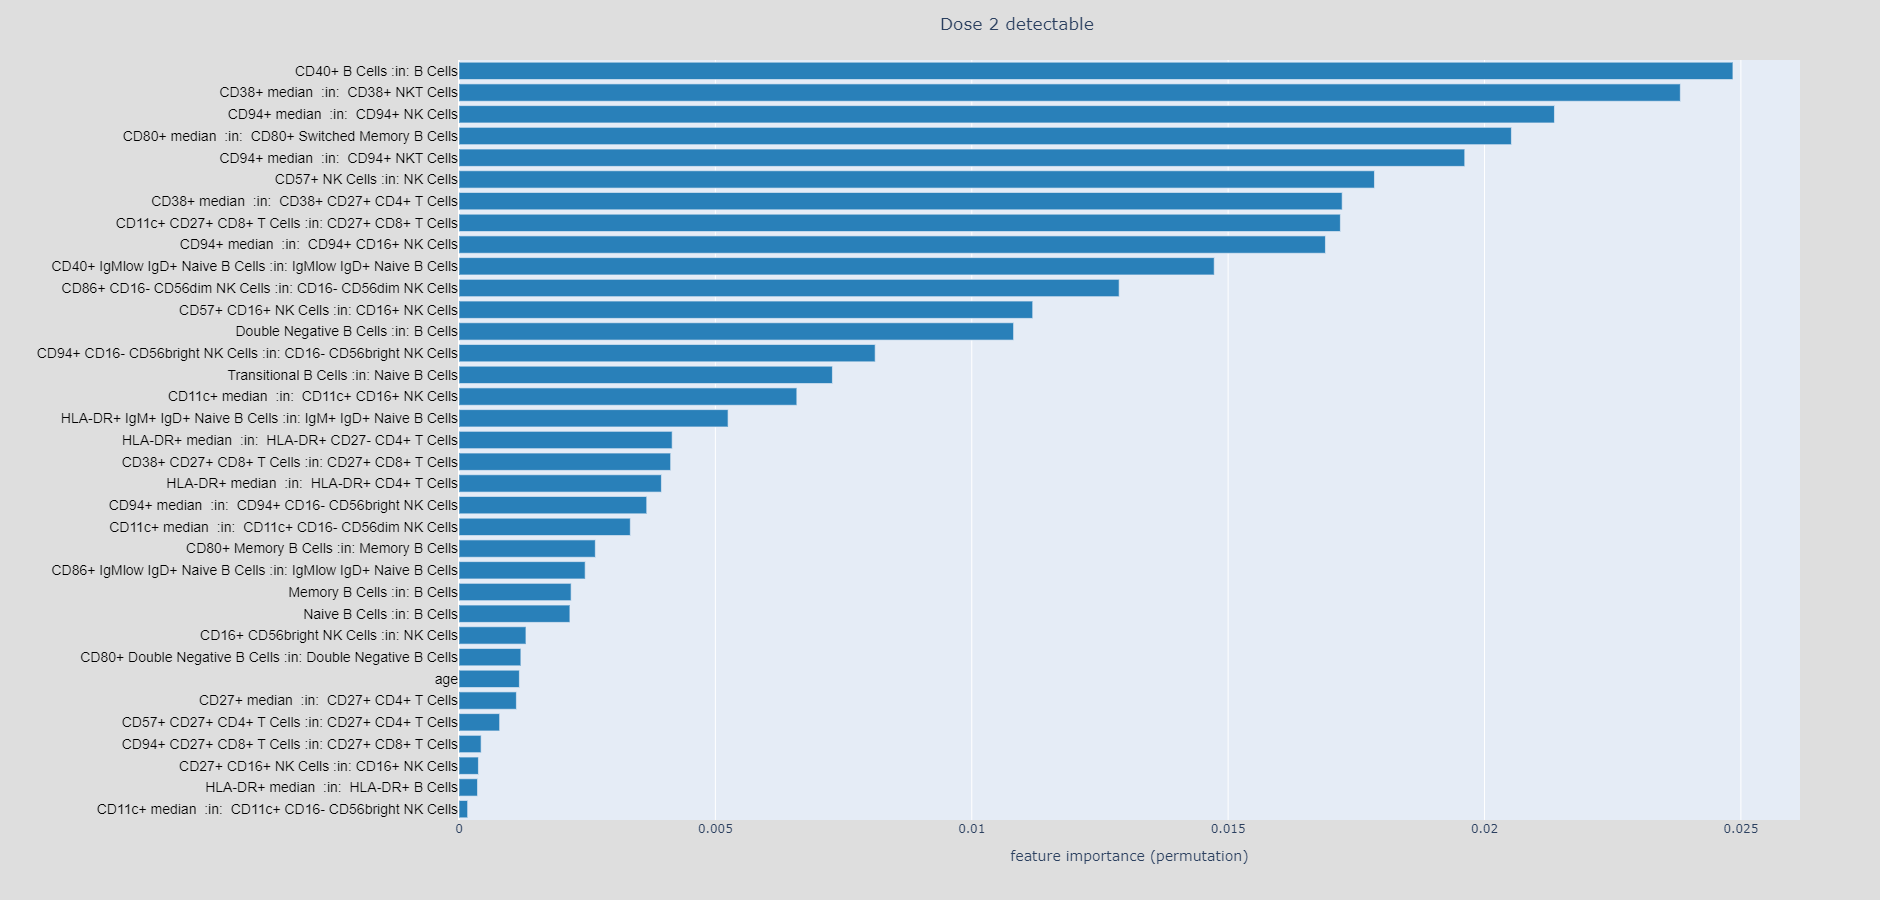

In [31]:
df = data["SVM_RFE_d2_d"]["df"]
df = df.sort_values(by="impor_mean",ascending=False)
fig1 = px.bar(df.iloc[:35,:], x="impor_mean", y="var",orientation='h',labels={"impor_mean": "feature importance (permutation)","var": ""})
fig1.update_layout(showlegend=False,height = 900,yaxis={'categoryorder':'total ascending'},width = 1000,title = "Dose 2 detectable")
fig1.layout.title.xanchor = 'left'
fig1.layout.title.x = 0.5
fig1.update_traces(marker_color='rgba(41, 128, 185, 1.0)')
fig1.layout.yaxis.tickfont = dict(size =14, color='black', family='Arial, sans-serif')
fig1.layout.paper_bgcolor = 'rgb(222,222,222)'
fig1.update(layout_coloraxis_showscale=False)
#fig1.update_yaxes(ticklabelposition="inside top", title=None)
fig1.write_image("fig_ml_A.svg")
fig1

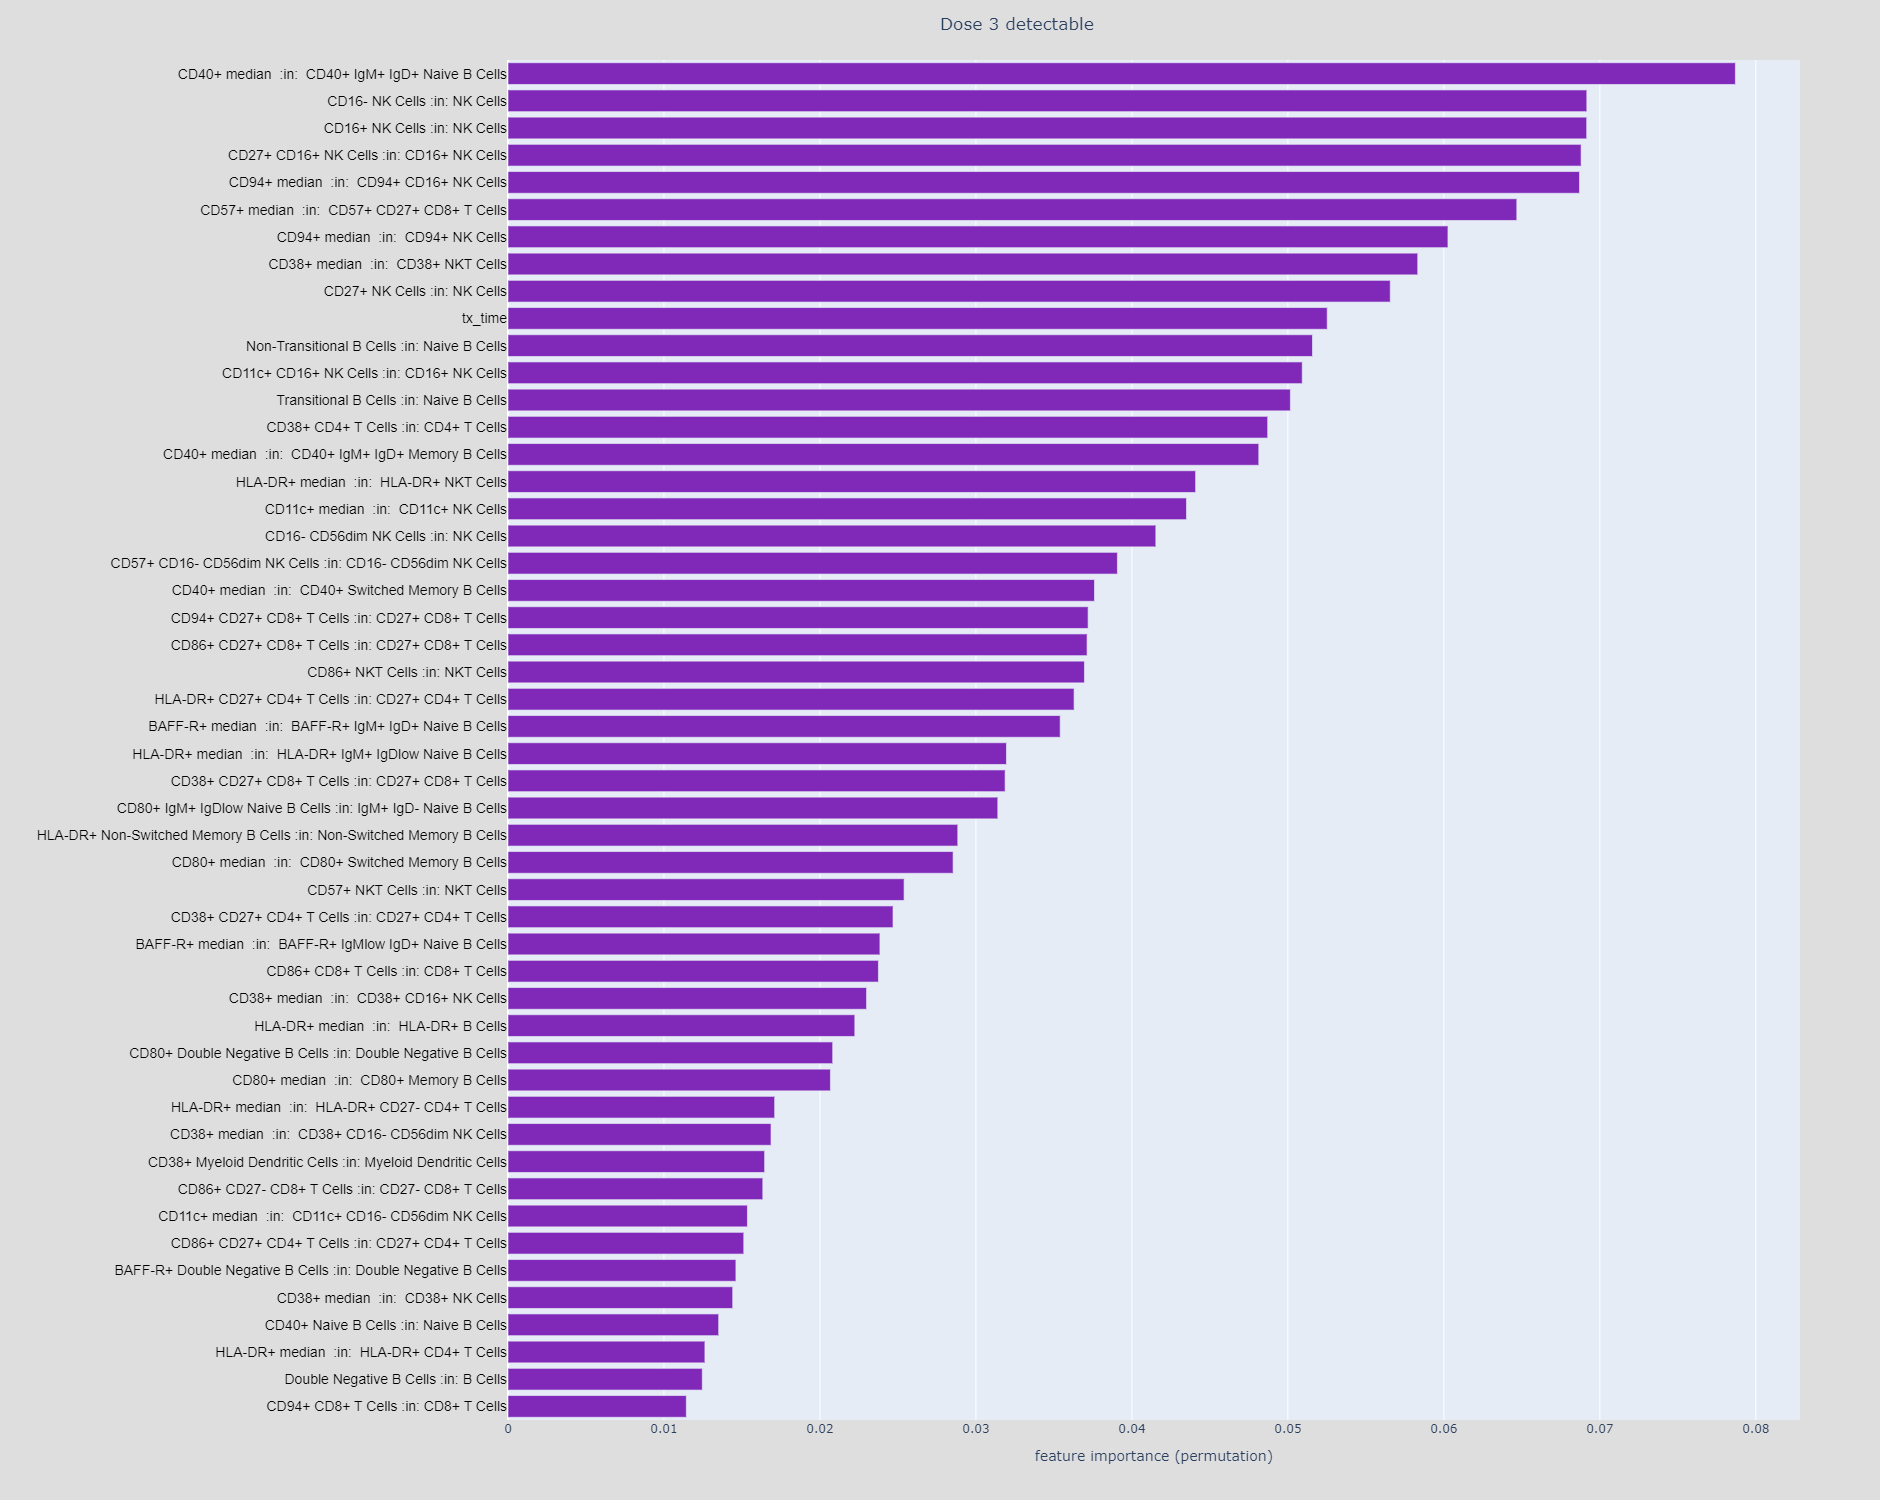

In [33]:
df = data["SVM_RFE_d3_d"]["df"]
df = df.sort_values(by="impor_mean",ascending=False)
fig2 = px.bar(df.iloc[:50,:], x="impor_mean", y="var",orientation='h',labels={"impor_mean": "feature importance (permutation)","var": ""})
fig2.update_layout(showlegend=False,height = 1500,yaxis={'categoryorder':'total ascending'},width = 1000,title = "Dose 3 detectable")
fig2.layout.title.xanchor = 'left'
fig2.layout.title.x = 0.5
fig2.update_traces(marker_color='rgba( 128,41, 185, 1.0)')
fig2.layout.yaxis.tickfont = dict(size =14, color='black', family='Arial, sans-serif')
fig2.layout.paper_bgcolor = 'rgb(222,222,222)'
fig2.update(layout_coloraxis_showscale=False)
#fig2.update_yaxes(ticklabelposition="inside top", title=None)
fig2.write_image("fig_ml_B.svg")
fig2

In [34]:
fold = os.getcwd()
file = open(fold + "/data_aux/feature_eval.pkl","rb")
data = pk.load(file)
file.close()

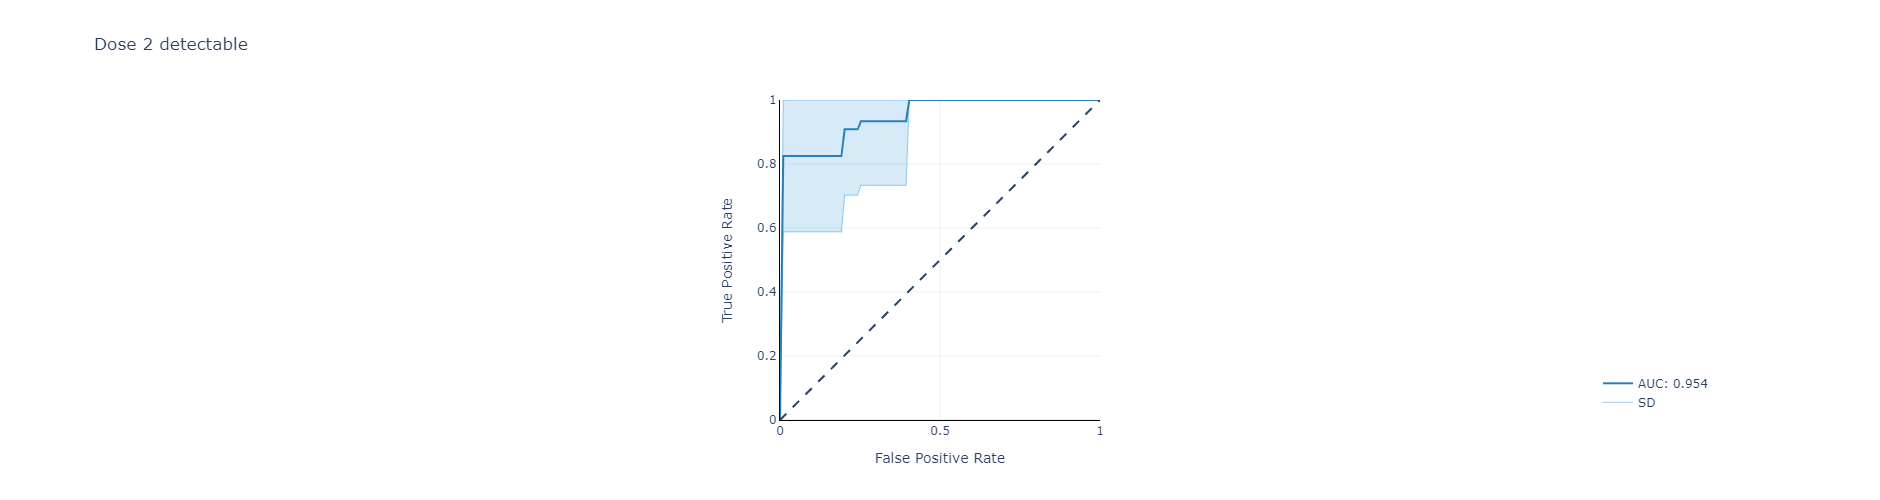

In [36]:
y_true_d2_d  = []
y_true_d3_d  = []
y_score_d2_d = []
y_score_d3_d = []
for i in range(len(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"])):
    y_true_d2_d.append(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"][i]["y_true"])
    y_true_d3_d.append(data["comp"]["SVM_RFE_d3_d"]["SVM_d3_d"][i]["y_true"])
    y_score_d2_d.append(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"][i]["z"])
    y_score_d3_d.append(data["comp"]["SVM_RFE_d3_d"]["SVM_d3_d"][i]["z"])


kind = 'val'
c_line      = 'rgba(52, 152, 219, 0.5)'
c_fill      = 'rgba(52, 152, 219, 0.2)'
c_line_main = 'rgba(41, 128, 185, 1.0)'
c_grid      = 'rgba(189, 195, 199, 0.5)'
#c_annot     = 'rgba(149, 165, 166, 0.5)'
#c_highlight = 'rgba(192, 57, 43, 1.0)'
fpr_mean    = np.linspace(0, 1, 100)
interp_tprs_d2_d = []
interp_tprs_d3_d = []
interp_tprs_d3_p = []
for i in range(len(y_true_d2_d)):
    fpr_d2_d, tpr_d2_d, thresholds = roc_curve(y_true_d2_d[i], y_score_d2_d[i])
    fpr_d3_d, tpr_d3_d, thresholds = roc_curve(y_true_d3_d[i], y_score_d3_d[i])
    interp_tpr_d2_d    = np.interp(fpr_mean, fpr_d2_d, tpr_d2_d)
    interp_tpr_d3_d    = np.interp(fpr_mean, fpr_d3_d, tpr_d3_d)
    interp_tpr_d2_d[0] = 0.0
    interp_tpr_d3_d[0] = 0.0
    interp_tprs_d2_d.append(interp_tpr_d2_d)
    interp_tprs_d3_d.append(interp_tpr_d3_d)
tpr_mean_d2_d     = np.mean(interp_tprs_d2_d, axis=0)
tpr_mean_d3_d     = np.mean(interp_tprs_d3_d, axis=0)
tpr_mean_d2_d[-1] = 1.0
tpr_mean_d3_d[-1] = 1.0
tpr_std_d2_d      = np.std(interp_tprs_d2_d, axis=0)
tpr_std_d3_d      = np.std(interp_tprs_d3_d, axis=0)
tpr_upper_d2_d    = np.clip(tpr_mean_d2_d+tpr_std_d2_d, 0, 1)
tpr_upper_d3_d    = np.clip(tpr_mean_d3_d+tpr_std_d3_d, 0, 1)
tpr_lower_d2_d    = tpr_mean_d2_d-tpr_std_d2_d
tpr_lower_d3_d    = tpr_mean_d3_d-tpr_std_d3_d

fig3 = go.Figure([
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_upper_d2_d,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'SD'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_lower_d2_d,
        fill       = 'tonexty',
        fillcolor  = c_fill,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = False,
        name       = 'lower'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_mean_d2_d,
        line       = dict(color=c_line_main, width=2),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'AUC: 0.954')
]
)
fig3.add_shape(
    type ='line', 
    line =dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig3.update_layout(
    template    = 'plotly_white', 
    title_x     = 0.5,
    title = "Dose 2 detectable",
    xaxis_title = "False Positive Rate",
    yaxis_title = "True Positive Rate",
    width       = 500,
    height      = 500,
    legend      = dict(
        yanchor="bottom", 
        xanchor="right", 
        x=0.95,
        y=0.01,
    )
)
fig3.update_yaxes(
    range       = [0, 1],
    scaleanchor = "x", 
    scaleratio  = 1,
    linecolor   = 'black')
fig3.update_xaxes(
    range       = [0, 1],
    constrain   = 'domain',
    linecolor   = 'black')
fig3.write_image("fig_ml_c.svg")
fig3

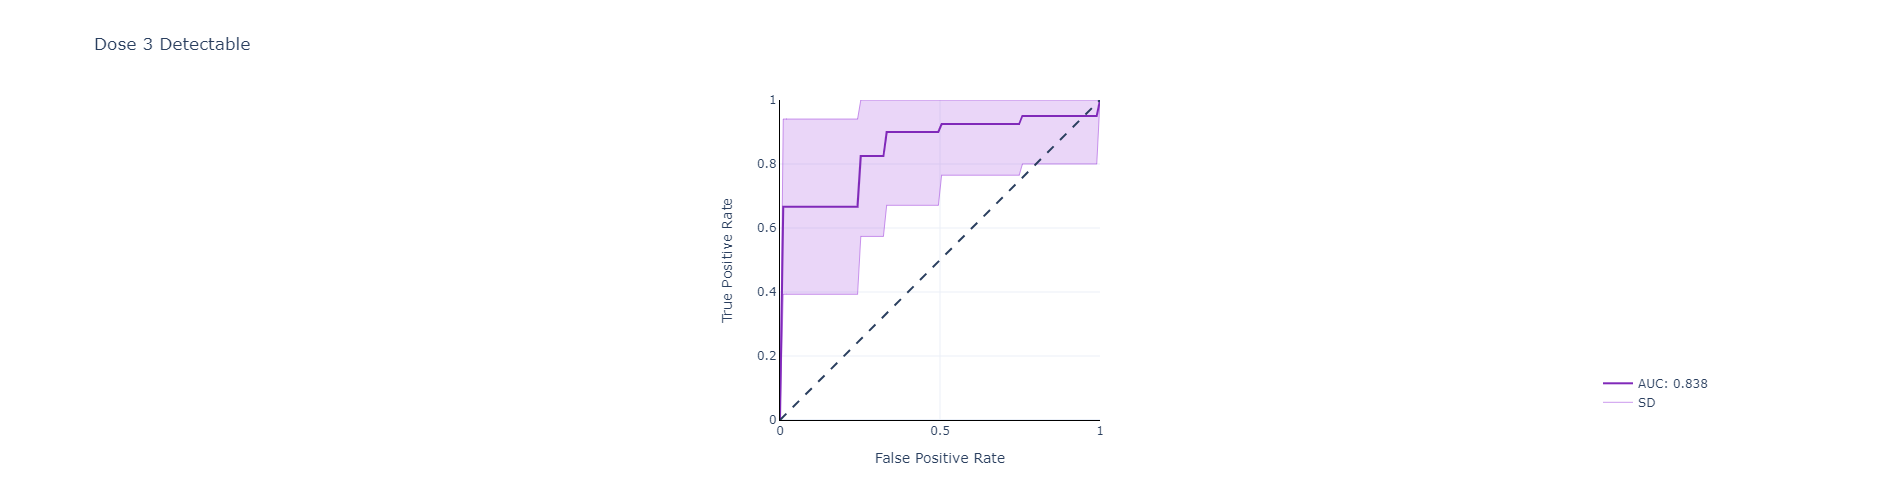

In [37]:
c_line      = 'rgba( 152,52, 219, 0.5)'
c_fill      = 'rgba( 152,52, 219, 0.2)'
c_line_main = 'rgba( 128,41, 185, 1.0)'
c_grid      = 'rgba( 195,189, 199, 0.5)'

fig4 = go.Figure([
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_upper_d3_d,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'SD'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_lower_d3_d,
        fill       = 'tonexty',
        fillcolor  = c_fill,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = False,
        name       = 'lower'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_mean_d3_d,
        line       = dict(color=c_line_main, width=2),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'AUC: 0.838')
]
)
fig4.add_shape(
    type ='line', 
    line =dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig4.update_layout(
    template    = 'plotly_white', 
    title_x     = 0.5,
    title = "Dose 3 Detectable",
    xaxis_title = "False Positive Rate",
    yaxis_title = "True Positive Rate",
    width       = 500,
    height      = 500,
    legend      = dict(
        yanchor="bottom", 
        xanchor="right", 
        x=0.95,
        y=0.01,
    )
)
fig4.update_yaxes(
    range       = [0, 1],
    scaleanchor = "x", 
    scaleratio  = 1,
    linecolor   = 'black')
fig4.update_xaxes(
    range       = [0, 1],
    constrain   = 'domain',
    linecolor   = 'black')
fig4.write_image("fig_ml_D.svg")
fig4